# Importing Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

warnings.simplefilter(action='ignore', category=Warning)

sns.set()

# Data Loading

In [2]:
# Load the iris dataset
data = load_iris()

# Get the feature matrix X and target vector y
X = data.data
y = data.target

# Get column names for features and target
feature_names = data.feature_names
target_names = data.target_names

# Combine feature matrix X and target vector y into a single DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = pd.Series(y).map(dict(zip(range(len(target_names)), target_names)))

# Display the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# Plotting a Histogram

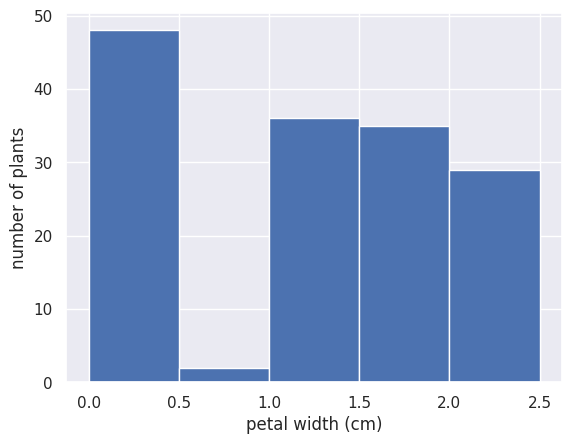

In [3]:

bin_edges = [0, 0.5, 1.0, 1.5, 2, 2.5]

_ = plt.hist(df['petal width (cm)'], bins=bin_edges) # bins is optional. another way of adjusting bins is defining bins count like bins=5
_ = plt.xlabel('petal width (cm)')
_ = plt.ylabel('number of plants')
plt.show()

# Note: Choice of bins is crucial since the plot may misslead us. 

# Bee Swarm Plots



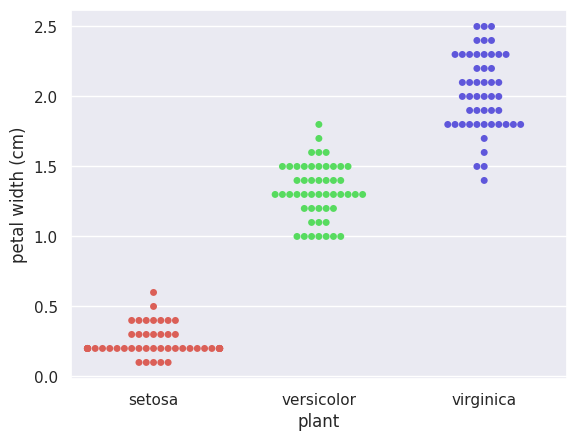

In [4]:
# Set number of target values and generate color palette
n_targets = len(df['target'].unique())
palette = sns.color_palette('hls', n_targets)

_ = sns.swarmplot(x='target', y='petal width (cm)', data=df, palette=palette)
_ = plt.xlabel('plant')
_ = plt.ylabel('petal width (cm)')
plt.show()

# Empirical Cumulative Distribution Function (ECDF)

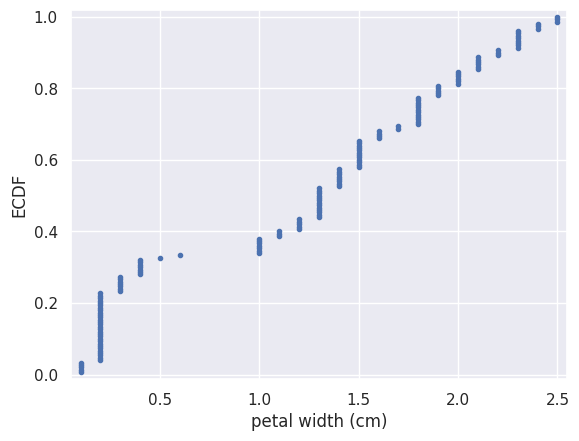

In [15]:

x = np.sort(df['petal width (cm)'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('petal width (cm)')
_ = plt.ylabel('ECDF')


plt.margins(0.02) # Keeps data off plot edges
plt.show()

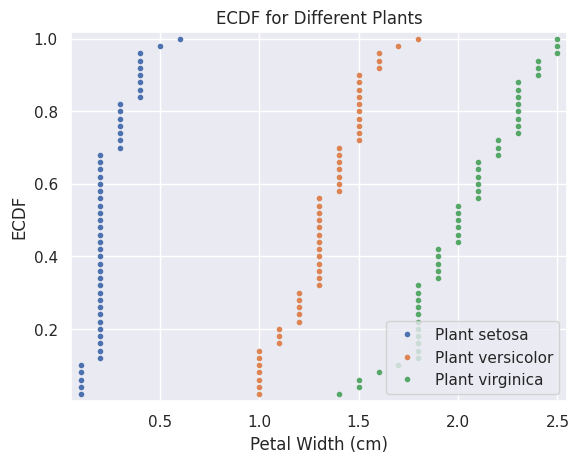

In [9]:
# Get unique plant types
plant_types = df['target'].unique()

# Plot ECDF for each plant type
for plant_type in plant_types:
    plant = df[df['target'] == plant_type]['petal width (cm)']
    x = np.sort(plant)
    y = np.arange(1, len(x)+1) / len(x)
    _ = plt.plot(x, y, marker='.', linestyle='none', label=f'Plant {plant_type}')

# Add labels and legend
_ = plt.xlabel('Petal Width (cm)')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF for Different Plants')
_ = plt.legend()

# Set margins and display plot
plt.margins(0.02)
plt.show()

# Box Plot

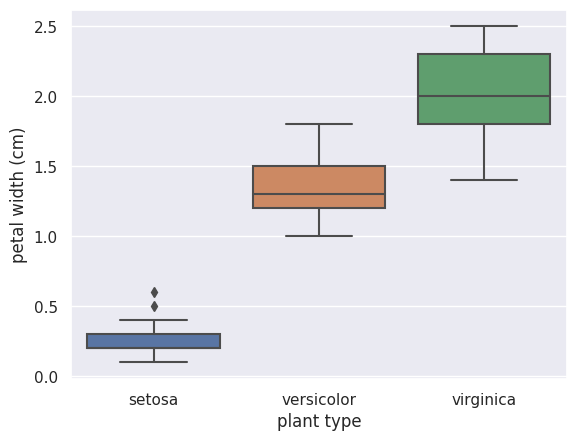

In [10]:
_ = sns.boxplot(x='target', y='petal width (cm)', data=df)
_ = plt.xlabel('plant type')
_ = plt.ylabel('petal width (cm)')
plt.show()

# Scatter Plot

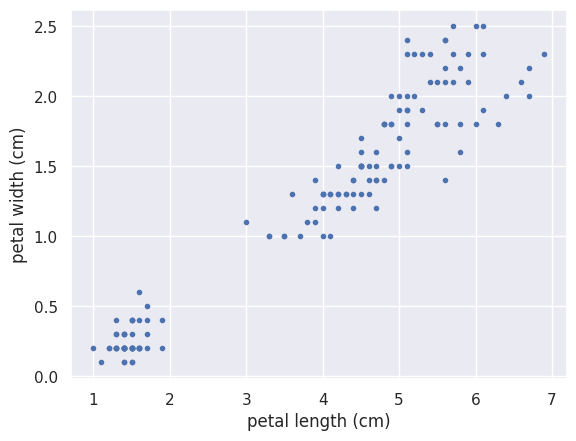

In [12]:
_ = plt.plot(df['petal length (cm)'], df['petal width (cm)'], marker='.', linestyle='none')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

plt.show()

# Descriptive Statistics

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [18]:
df.groupby('target').agg({'sepal length (cm)':('min', 'mean', 'median', 'max')})

sepal length (cm)                   
                         min   mean median  max
target                                         
setosa                   4.3  5.006    5.0  5.8
versicolor               4.9  5.936    5.9  7.0
virginica                4.9  6.588    6.5  7.9